по базе используемые библиотеки:

ссылочка на прекрасный суп: https://beautiful-soup-4.readthedocs.io/en/latest/

сейчас бы поиграть в коты и супы,а не вот это вот всё....


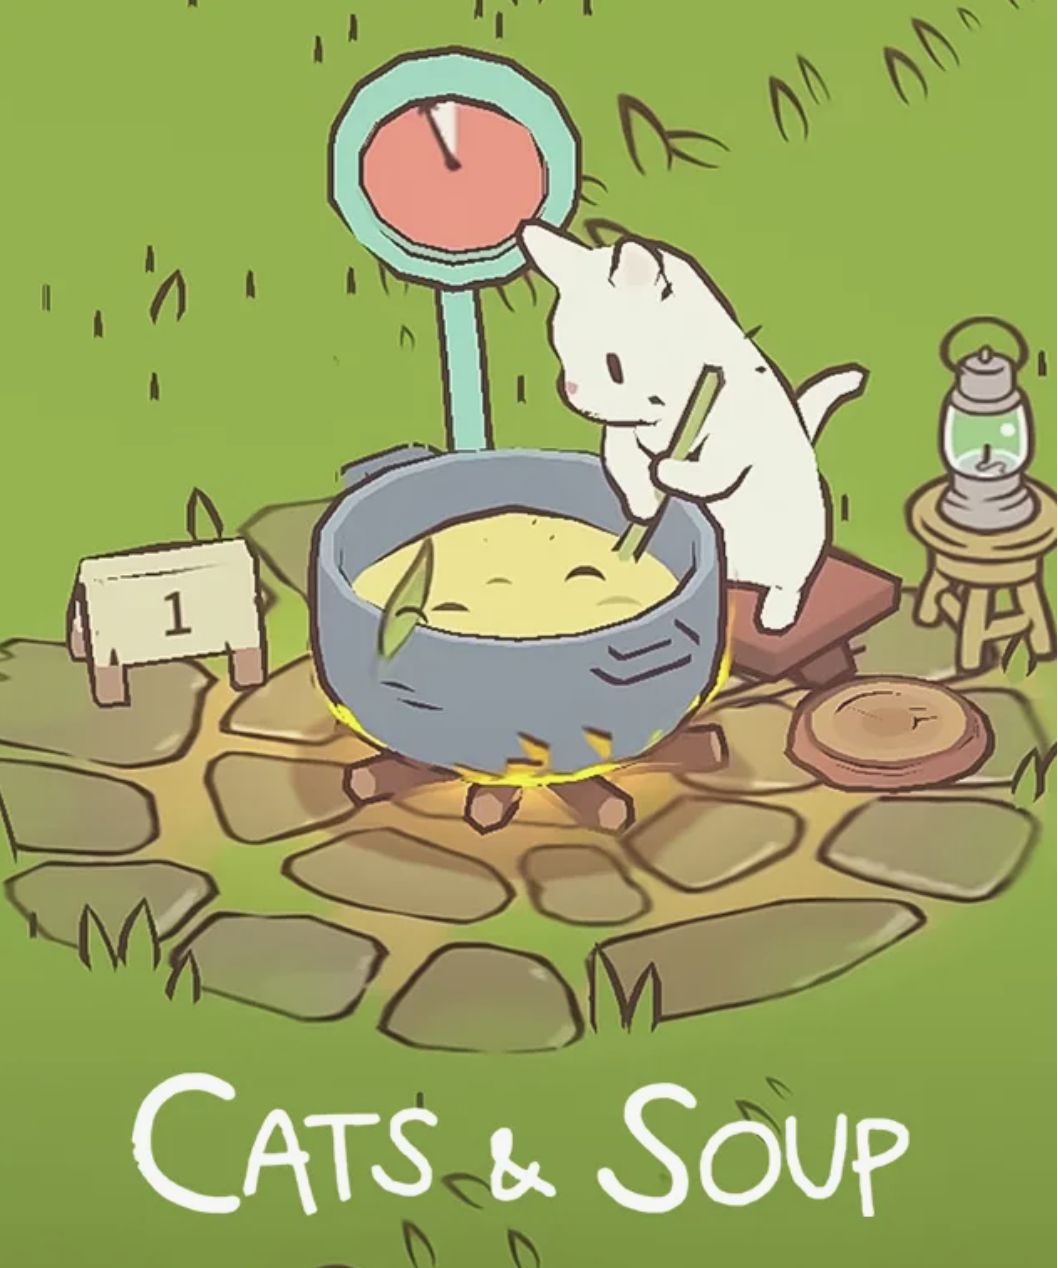

In [90]:
import pandas as pd
import re 
from bs4 import BeautifulSoup

тут открываем датасет, который подготовила наша тим...
снова лофт захотелось,но оргать лень

In [10]:
ikanampub_df = pd.read_csv("готовый_датасет.csv")
ikanampub_df

,post_id,post_date,post_text,post_source,type,comment_id,comment_text
0,5836,2025-03-25 22:30:00,"ХОБА, ВЕСЕННИЙ ЛОФТ!🎉\n\nУже чувствуете этот в...",https://vk.com/wall-130344439_5836,пост,К посту комментариев нет,К посту комментариев нет
1,5880,2025-05-27 12:29:30,Всем привет всем привет \n \nИщем датасаентист...,https://vk.com/wall-130344439_5880,пост,К посту комментариев нет,К посту комментариев нет
2,5879,2025-05-16 11:09:02,Всем общий саламчик!\n\nМы ищем в Мегафон DS у...,https://vk.com/wall-130344439_5879,пост,К посту комментариев нет,К посту комментариев нет
3,5878,2025-04-27 15:54:51,"Гаааайс, а вот и фотки с лофта подъехали📸🔥 \n ...",https://vk.com/wall-130344439_5878,пост,К посту комментариев нет,К посту комментариев нет
4,5875,2025-04-25 19:18:14,ДО ЛОФТА ЧАС🔥\n\nА пока вы готовитесь разносит...,https://vk.com/wall-130344439_5875,пост,К посту комментариев нет,К посту комментариев нет
...,...,...,...,...,...,...,...
3030,для статьи используем ссылку на пост,2018-06-18 00:00:00,Как стать дата саентистом\nВнимание! Этот гайд...,https://vk.com/@ikanam-kak-stat-data-saentistom,статья,К посту комментариев нет,К посту комментариев нет
3031,для статьи используем ссылку на пост,2018-06-30 00:00:00,Просто откройте и прочитайте\nМы хотим сделать...,https://vk.com/@ikanam-prosto-otkroite-i-proch...,статья,К посту комментариев нет,К посту комментариев нет
3032,для статьи используем ссылку на пост,2018-04-23 00:00:00,Мини-карьерная пятница\nВсем привет! Тут 2 инт...,https://vk.com/@ikanam-mini-karernaya-pyatnica,статья,К посту комментариев нет,К посту комментариев нет
3033,для статьи используем ссылку на пост,2018-03-05 00:00:00,"Сезон карьеры объявляется открытым\nПривет, вс...",https://vk.com/@ikanam-sezon-karery-obyavlyaet...,статья,К посту комментариев нет,К посту комментариев нет


### Основная предобработка 

сварганили функцию, которая делает следующие вещи:
1. Смотрит есть ли пустые значения, если да,то лучше ломать пока ниче не будем
2. Использует красивый суп для удаления html тегов
3. Удаляет url ссылки с помощью регулярных выражений
4. Удаляет всякий мусор из смайликов и подобной штукенции
5. Убирает лишние пробелы
6. Удаляет не особо нужные символы

In [108]:
def preprocessing(row):
    if pd.isna(row):
        return row
        
    row = BeautifulSoup(row, 'html.parser').get_text()   
    row = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', row)
    row = re.sub(r'[▼▲●■◆◄►★☆☺☹♡♥♦♣♠]', '', row)
    row = ' '.join(row.split())
    row = re.sub(r'[^\w\s.,!?-]', '', row, flags=re.UNICODE)
    
    return row.strip()

применяем к текстовым столбцам функцию предобработки

In [104]:
ikanampub_df['comment_text'] = ikanampub_df['comment_text'].apply(preprocessing)
ikanampub_df['post_text'] = ikanampub_df['post_text'].apply(preprocessing)
ikanampub_df.index = range(1, len(ikanampub_df) + 1)

тут мы заметили НаНы в самих постах, похихикали над одним из этих постов, когда проверяли:

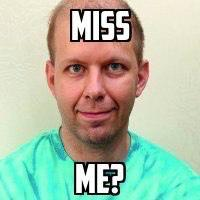

после этого решили, что нам надо пометить в дф, что вместо пустых значений люди присылали/выкладывали фотографии

In [101]:
ikanampub_df['comment_text'].fillna('Тут отправили фото', inplace=True)
ikanampub_df['post_text'].fillna('Тут выложили фото', inplace=True)

/var/folders/kg/74cjh_4n58b9dfk8dj9txhn00000gn/T/ipykernel_8115/3583568470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ikanampub_df['comment_text'].fillna('Тут отправили фото', inplace=True)
/var/folders/kg/74cjh_4n58b9dfk8dj9txhn00000gn/T/ipykernel_8115/3583568470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

Далее начали группировать по айдишникам, но что-то ломалось и спустя некоторое время дошло, что всё-таки дело в айдишниках статей, поэтому группируем по дате опубликования поста/статьи.

Создаём дф из столбцов: post_date, post_id, post_source, post_text и comment_text(списки комментариев)

Редактируем, подчищаем пустые значения опять (слишком бесят)

In [107]:
ikanam_public_df = ikanampub_df.groupby('post_date').agg({
    'post_id' : 'first',
    'post_source': 'first', 
    'post_text': 'first',
    'comment_text': list
}).reset_index()
ikanam_public_df.index = range(1, len(ikanam_public_df) + 1)
ikanam_public_df['post_text'] = ikanam_public_df['post_text'].fillna('Тут выложили фото')

тут проверели на наличие нанов

In [89]:
na_summary = ikanam_public_df.isna().sum()
na_summary

post_date       0
post_id         0
post_source     0
post_text       0
comment_text    0
dtype: int64